In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 76 bytes


In [ ]:
!kaggle datasets download -d vuppalaadithyasairam/bone-fracture-detection-using-xrays

Dataset URL: https://www.kaggle.com/datasets/vuppalaadithyasairam/bone-fracture-detection-using-xrays
License(s): unknown
 96% 165M/172M [00:01<00:00, 129MB/s]
100% 172M/172M [00:01<00:00, 114MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "/content/bone-fracture-detection-using-xrays.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from zipfile import ZipFile

<ipython-input-4-36398ed231ac>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random
import PIL
import PIL.Image

In [ ]:
test_loc='/content/archive (6)/val'
train_loc='/content/archive (6)/train'

In [ ]:
#dataset loader
import tensorflow
from tensorflow.keras.preprocessing import image_dataset_from_directory

image_size=(96,96)
batch_size=10

train_dataset=image_dataset_from_directory(train_loc,
                                           batch_size=batch_size,
                                           image_size=image_size,
                                           validation_split=0.2,
                                           subset="training",
                                           shuffle=True,
                                           seed=42)


test_dataset=image_dataset_from_directory(test_loc,
                                           batch_size=batch_size,
                                           image_size=image_size,
                                           shuffle=True,
                                           seed=42)

Found 8863 files belonging to 2 classes.
Using 7091 files for training.
Found 600 files belonging to 2 classes.


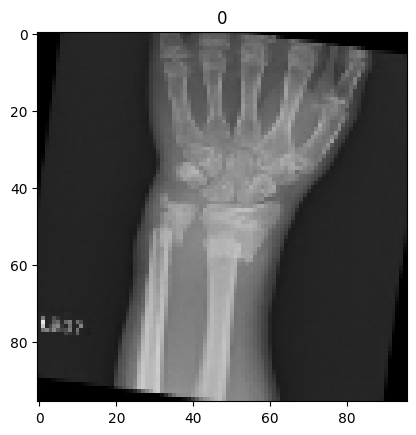

In [ ]:
for images,labels in train_dataset.take(1):

    random_idx=random.randint(0,batch_size-1)

    random_image=images[random_idx]
    random_label=labels[random_idx]

    plt.imshow(random_image.numpy().astype("uint8"))
    plt.title(random_label.numpy())
    plt.show()


In [ ]:
!pip install timm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 8.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manyl

In [ ]:
#START

In [ ]:
pip install vit-keras

In [ ]:
pip install --upgrade vit-keras

Found 7091 images belonging to 2 classes.
Found 1772 images belonging to 2 classes.
Epoch 1/30
222/222 [==============================] - ETA: 0s - loss: 0.7216 - accuracy: 0.5042
Epoch 1: val_accuracy improved from -inf to 0.50846, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


222/222 [==============================] - 57s 244ms/step - loss: 0.7216 - accuracy: 0.5042 - val_loss: 0.6876 - val_accuracy: 0.5085
Epoch 2/30
222/222 [==============================] - ETA: 0s - loss: 0.6872 - accuracy: 0.5410
Epoch 2: val_accuracy improved from 0.50846 to 0.55982, saving model to best_model.h5
222/222 [==============================] - 55s 250ms/step - loss: 0.6872 - accuracy: 0.5410 - val_loss: 0.6784 - val_accuracy: 0.5598
Epoch 3/30
222/222 [==============================] - ETA: 0s - loss: 0.6742 - accuracy: 0.5682
Epoch 3: val_accuracy improved from 0.55982 to 0.56716, saving model to best_model.h5
222/222 [==============================] - 51s 230ms/step - loss: 0.6742 - accuracy: 0.5682 - val_loss: 0.6997 - val_accuracy: 0.5672
Epoch 4/30
222/222 [==============================] - ETA: 0s - loss: 0.6620 - accuracy: 0.5893
Epoch 4: val_accuracy improved from 0.56716 to 0.57788, saving model to best_model.h5
222/222 [==============================] - 52s 234ms

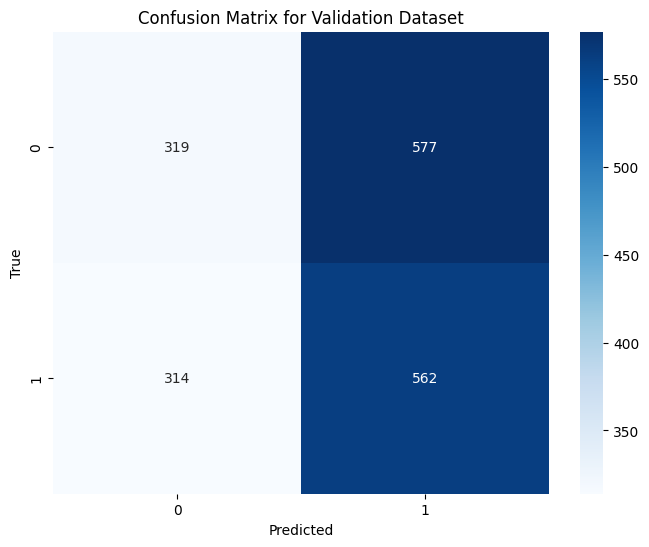

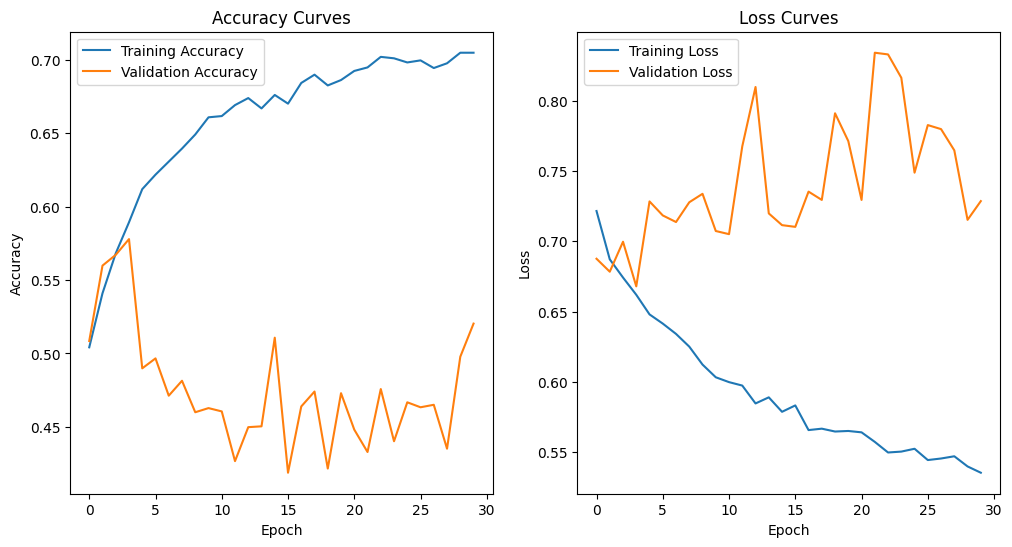

56/56 [==============================] - 8s 135ms/step


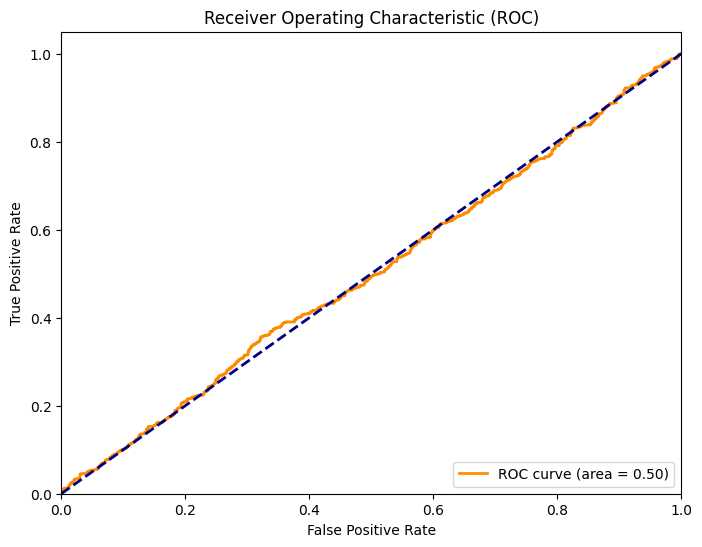

56/56 [==============================] - 9s 159ms/step
Precision: 0.49
Recall: 0.66
F1 Score: 0.56


In [ ]:
#Perciever new
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Flatten, LayerNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

def load_data(train_dir, validation_dir, image_size=(128, 128), batch_size=32):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
    )

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='training'
    )

    validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation'
    )

    return train_generator, validation_generator

def build_perceiver(input_shape=(128, 128, 3), num_classes=1):
    inputs = Input(shape=input_shape)
    x = inputs

    # Flatten the input
    x = Flatten()(x)

    # MLP Encoder with Dense layers in the specified order
    x = Dense(1024, activation='relu')(x)
    x = LayerNormalization()(x)
    x = Dense(512, activation='relu')(x)
    x = LayerNormalization()(x)
    x = Dense(216, activation='relu')(x)
    x = LayerNormalization()(x)

    # Classification head
    outputs = Dense(num_classes, activation='sigmoid')(x)

    model = Model(inputs, outputs)
    return model

def train_model(model, train_generator, validation_generator, epochs=30):
    model.compile(optimizer=Adam(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

    history = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[checkpoint]
    )

    return history

def evaluate_model(model, validation_generator):
    predictions = model.predict(validation_generator)
    y_pred = np.where(predictions > 0.5, 1, 0)
    y_true = validation_generator.classes[:len(y_pred)]

    print("Classification Report for Validation Dataset:")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title('Confusion Matrix for Validation Dataset')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def plot_metrics(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curves')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Curves')
    plt.legend()

    plt.show()

def plot_roc(model, validation_generator):
    predictions = model.predict(validation_generator)
    fpr, tpr, _ = roc_curve(validation_generator.classes, predictions)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

def main():
    train_dir = '/content/archive (6)/train'
    validation_dir = '/content/archive (6)/val'

    train_generator, validation_generator = load_data(train_dir, validation_dir)
    model = build_perceiver()

    epochs = 30
    history = train_model(model, train_generator, validation_generator, epochs=epochs)

    evaluate_model(model, validation_generator)
    plot_metrics(history)
    plot_roc(model, validation_generator)

    # Calculate additional metrics
    predictions = model.predict(validation_generator)
    y_pred = np.where(predictions > 0.5, 1, 0)
    y_true = validation_generator.classes[:len(y_pred)]

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

if __name__ == "__main__":
    main()


Found 7091 images belonging to 2 classes.
Found 1772 images belonging to 2 classes.
58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/30
222/222 [==============================] - ETA: 0s - loss: 0.6170 - accuracy: 0.6472
Epoch 1: val_accuracy improved from -inf to 0.49210, saving model to best_model.h5
222/222 [==============================] - 65s 263ms/step - loss: 0.6170 - accuracy: 0.6472 - val_loss: 0.9358 - val_accuracy: 0.4921
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


222/222 [==============================] - ETA: 0s - loss: 0.4909 - accuracy: 0.7600
Epoch 2: val_accuracy improved from 0.49210 to 0.53104, saving model to best_model.h5
222/222 [==============================] - 53s 241ms/step - loss: 0.4909 - accuracy: 0.7600 - val_loss: 0.8683 - val_accuracy: 0.5310
Epoch 3/30
222/222 [==============================] - ETA: 0s - loss: 0.4217 - accuracy: 0.8078
Epoch 3: val_accuracy improved from 0.53104 to 0.53950, saving model to best_model.h5
222/222 [==============================] - 52s 235ms/step - loss: 0.4217 - accuracy: 0.8078 - val_loss: 1.0217 - val_accuracy: 0.5395
Epoch 4/30
222/222 [==============================] - ETA: 0s - loss: 0.3815 - accuracy: 0.8261
Epoch 4: val_accuracy improved from 0.53950 to 0.54063, saving model to best_model.h5
222/222 [==============================] - 51s 230ms/step - loss: 0.3815 - accuracy: 0.8261 - val_loss: 1.0857 - val_accuracy: 0.5406
Epoch 5/30
222/222 [==============================] - ETA: 0s -

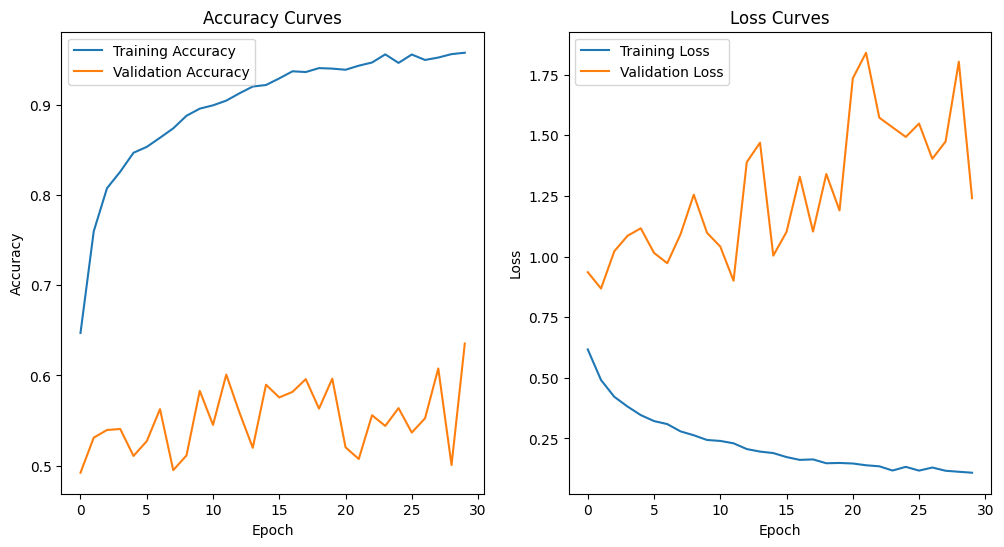

56/56 [==============================] - 10s 181ms/step
Classification Report for Validation Dataset:
              precision    recall  f1-score   support

           0       0.50      0.51      0.51       896
           1       0.49      0.48      0.48       876

    accuracy                           0.50      1772
   macro avg       0.50      0.50      0.50      1772
weighted avg       0.50      0.50      0.50      1772



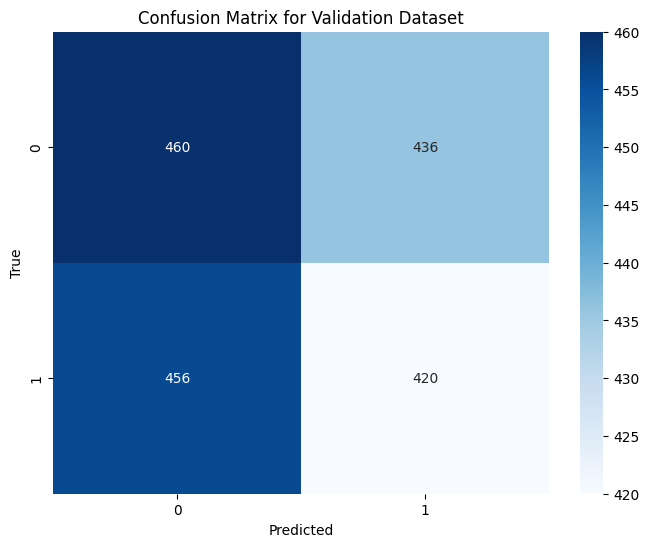

In [ ]:
#VGG 16 NEW
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, LayerNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16

def load_data(train_dir, validation_dir, image_size=(128, 128), batch_size=32):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
    )

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='training'
    )

    validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation'
    )

    return train_generator, validation_generator

def build_vgg16_model(input_shape=(128, 128, 3), num_classes=1):
    base_model = VGG16(input_shape=input_shape,
                       include_top=False,
                       weights='imagenet')

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)  # Moved dense layer with 1024 units before others
    x = Dense(512, activation='relu')(x)    # Moved dense layer with 512 units after 1024 units
    x = Dense(256, activation='relu')(x)    # Moved dense layer with 256 units after 512 units
    predictions = Dense(num_classes, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    return model

def train_model(model, train_generator, validation_generator, epochs=10):
    model.compile(optimizer=Adam(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

    history = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[checkpoint]
    )

    return history

def evaluate_model(model, validation_generator):
    predictions = model.predict(validation_generator)
    y_pred = np.where(predictions > 0.5, 1, 0)
    y_true = validation_generator.classes[:len(y_pred)]

    print("Classification Report for Validation Dataset:")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title('Confusion Matrix for Validation Dataset')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def plot_metrics(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curves')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Curves')
    plt.legend()

    plt.show()

def main():
    train_dir = '/content/archive (6)/train'
    validation_dir = '/content/archive (6)/val'

    train_generator, validation_generator = load_data(train_dir, validation_dir)
    model = build_vgg16_model()

    epochs = 30
    history = train_model(model, train_generator, validation_generator, epochs=epochs)

    plot_metrics(history)

    evaluate_model(model, validation_generator)

if __name__ == "__main__":
    main()


Found 7091 images belonging to 2 classes.
Found 1772 images belonging to 2 classes.
83683744/83683744 [==============================] - 1s 0us/step
Epoch 1/30
222/222 [==============================] - ETA: 0s - loss: 0.5340 - accuracy: 0.7305
Epoch 1: val_accuracy improved from -inf to 0.63770, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


222/222 [==============================] - 68s 256ms/step - loss: 0.5340 - accuracy: 0.7305 - val_loss: 0.7251 - val_accuracy: 0.6377
Epoch 2/30
222/222 [==============================] - ETA: 0s - loss: 0.4280 - accuracy: 0.7979
Epoch 2: val_accuracy improved from 0.63770 to 0.66817, saving model to best_model.h5
222/222 [==============================] - 51s 232ms/step - loss: 0.4280 - accuracy: 0.7979 - val_loss: 0.6908 - val_accuracy: 0.6682
Epoch 3/30
222/222 [==============================] - ETA: 0s - loss: 0.3719 - accuracy: 0.8357
Epoch 3: val_accuracy did not improve from 0.66817
222/222 [==============================] - 51s 229ms/step - loss: 0.3719 - accuracy: 0.8357 - val_loss: 0.8557 - val_accuracy: 0.5988
Epoch 4/30
222/222 [==============================] - ETA: 0s - loss: 0.3306 - accuracy: 0.8567
Epoch 4: val_accuracy did not improve from 0.66817
222/222 [==============================] - 51s 231ms/step - loss: 0.3306 - accuracy: 0.8567 - val_loss: 1.0127 - val_accur

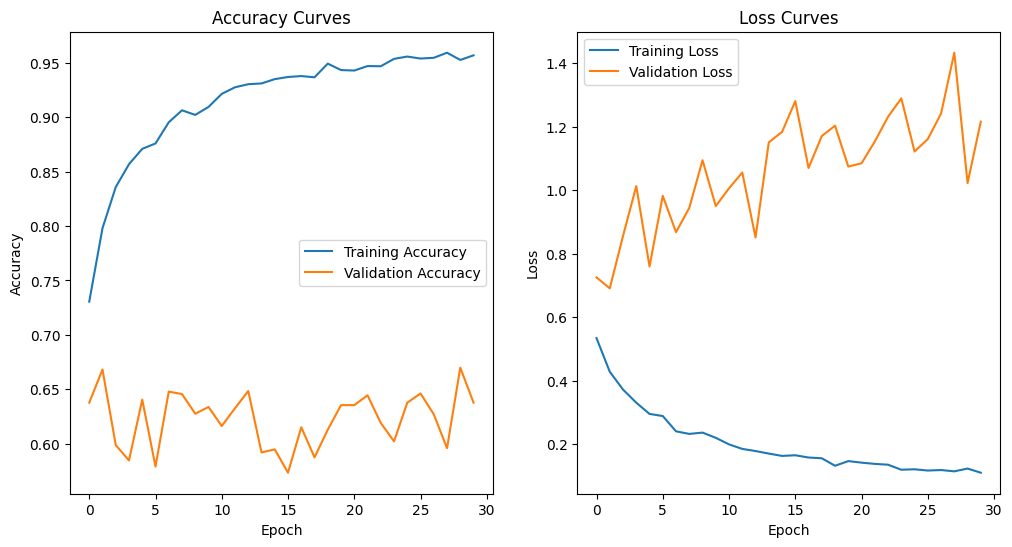

56/56 [==============================] - 11s 185ms/step
Classification Report for Validation Dataset:
              precision    recall  f1-score   support

           0       0.51      0.52      0.51       896
           1       0.50      0.49      0.50       876

    accuracy                           0.51      1772
   macro avg       0.51      0.51      0.51      1772
weighted avg       0.51      0.51      0.51      1772



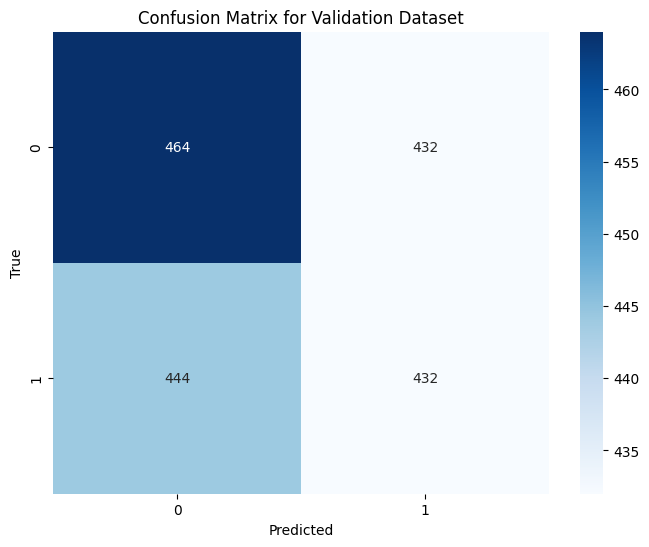

In [ ]:
#Xception model - base model new
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, LayerNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import Xception

def load_data(train_dir, validation_dir, image_size=(128, 128), batch_size=32):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
    )

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='training'
    )

    validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation'
    )

    return train_generator, validation_generator

def build_xception_model(input_shape=(128, 128, 3), num_classes=1):
    base_model = Xception(input_shape=input_shape,
                          include_top=False,
                          weights='imagenet')

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)  # Changed the order of dense layers
    x = Dense(256, activation='relu')(x)   # Changed the order of dense layers
    x = Dense(128, activation='relu')(x)   # Changed the order of dense layers
    predictions = Dense(num_classes, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# Define train_model, evaluate_model, plot_metrics functions as in the previous example

def main():
    train_dir = '/content/archive (6)/train'
    validation_dir = '/content/archive (6)/val'

    train_generator, validation_generator = load_data(train_dir, validation_dir)
    model = build_xception_model()

    epochs = 30
    history = train_model(model, train_generator, validation_generator, epochs=epochs)

    plot_metrics(history)

    evaluate_model(model, validation_generator)

if __name__ == "__main__":
    main()


Found 7091 images belonging to 2 classes.
Found 1772 images belonging to 2 classes.
94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/30
222/222 [==============================] - ETA: 0s - loss: 0.6992 - accuracy: 0.5012

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


222/222 [==============================] - 62s 244ms/step - loss: 0.6992 - accuracy: 0.5012 - val_loss: 0.6960 - val_accuracy: 0.5056
Epoch 2/30
222/222 [==============================] - 48s 215ms/step - loss: 0.6829 - accuracy: 0.5410 - val_loss: 0.6850 - val_accuracy: 0.5203
Epoch 3/30
222/222 [==============================] - 47s 213ms/step - loss: 0.6807 - accuracy: 0.5349 - val_loss: 0.6996 - val_accuracy: 0.4769
Epoch 4/30
222/222 [==============================] - 49s 220ms/step - loss: 0.6755 - accuracy: 0.5570 - val_loss: 0.7279 - val_accuracy: 0.4735
Epoch 5/30
222/222 [==============================] - 48s 217ms/step - loss: 0.6774 - accuracy: 0.5472 - val_loss: 0.6998 - val_accuracy: 0.4628
Epoch 6/30
222/222 [==============================] - 48s 216ms/step - loss: 0.6673 - accuracy: 0.5707 - val_loss: 0.7000 - val_accuracy: 0.4836
Epoch 7/30
222/222 [==============================] - 48s 215ms/step - loss: 0.6664 - accuracy: 0.5652 - val_loss: 0.6762 - val_accuracy: 0.5

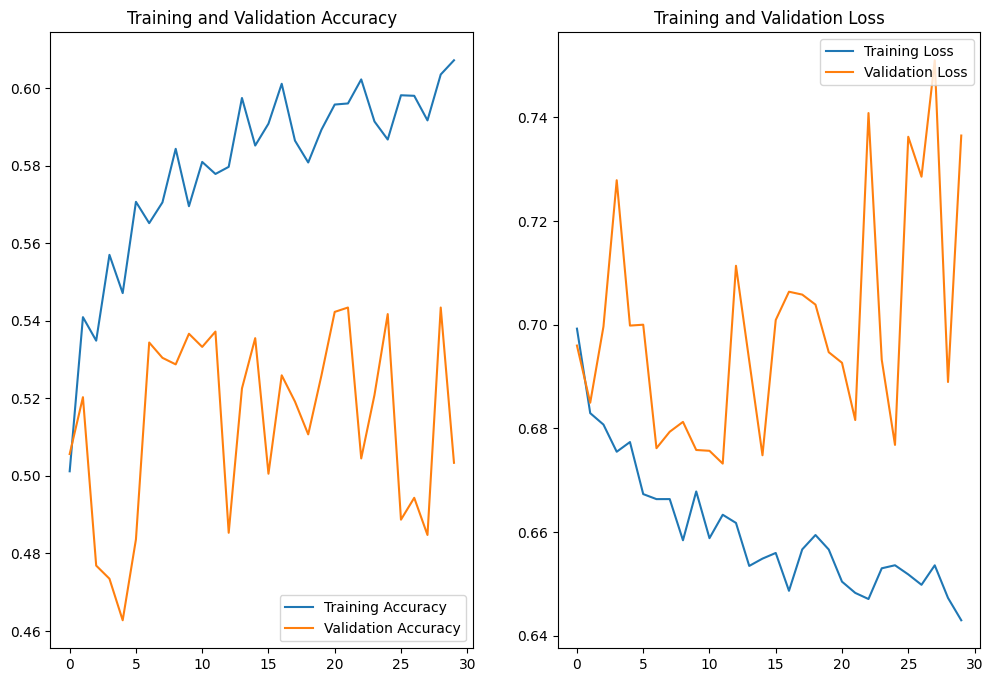

56/56 [==============================] - 11s 176ms/step
               precision    recall  f1-score   support

    fractured       0.50      0.59      0.54       896
not fractured       0.49      0.41      0.45       876

     accuracy                           0.50      1772
    macro avg       0.50      0.50      0.50      1772
 weighted avg       0.50      0.50      0.50      1772



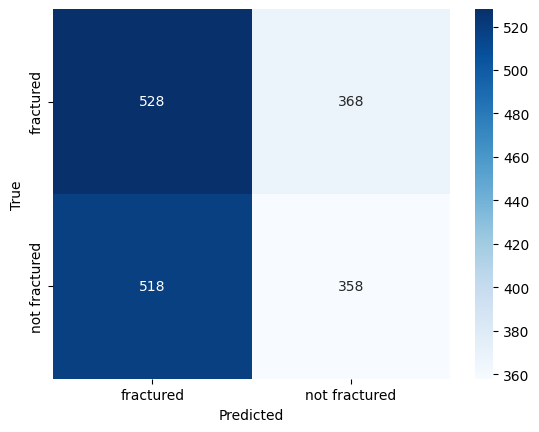

In [ ]:
# ResNet model new
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, LayerNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import ResNet50

def load_data(train_dir, validation_dir, image_size=(128, 128), batch_size=32):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
    )

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='training'
    )

    validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation'
    )

    return train_generator, validation_generator

def build_resnet_model(input_shape=(128, 128, 3), num_classes=1):
    base_model = ResNet50(input_shape=input_shape,
                          include_top=False,
                          weights='imagenet')

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    predictions = Dense(num_classes, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    return model

def train_model(model, train_generator, validation_generator, epochs=30):
    model.compile(optimizer=Adam(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator,
        callbacks=[checkpoint]
    )

    return history

def evaluate_model(model, validation_generator):
    validation_generator.reset()
    predictions = model.predict(validation_generator)
    y_pred = (predictions > 0.5).astype(int)
    y_true = validation_generator.classes

    print(classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys()))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def plot_metrics(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

def main():
    train_dir = '/content/archive (6)/train'
    validation_dir = '/content/archive (6)/val'

    train_generator, validation_generator = load_data(train_dir, validation_dir)
    model = build_resnet_model()

    epochs = 30
    history = train_model(model, train_generator, validation_generator, epochs=epochs)

    plot_metrics(history)

    evaluate_model(model, validation_generator)

if __name__ == "__main__":
    main()
